# 연속형 확률변수
이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다. 연속형 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral 모듈을 사용하여 구현함


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import warnings
warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)

#%precision 3

## 미적분 관계

- 총효용과 한계효용간의 관계를 미적분으로 설명할 수 있다.
- 총효용곡선의 특정 x에 대한 y값은 한계효용곡선의 하방면적과 같고 한계효용곡선의 특정 x에 대한 y값은 총효용곡선의 x에서의 기울기와 같다.

<img src = '미적분관계1.jpg' STYLE='width 100px;'>
<img src = '미적분관계3.jpg' STYLE='width 100px;'>


C:\Users\admin\AppData\Local\Temp\ipykernel_13156\574421191.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, f(x), 'b-', lw=1, c='k')
C:\Users\admin\AppData\Local\Temp\ipykernel_13156\574421191.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, g(x), 'b-', lw=1, c='b')


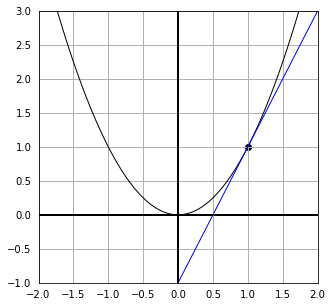

In [5]:
def f(x):
    return(x**2)
def g(x):
    return(2*x -1)

# x가 1일때의 접선의 방정식 2x -1, 기울기는 1
x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_13156\23841766.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, g(x), 'b-', lw=1, c='b')


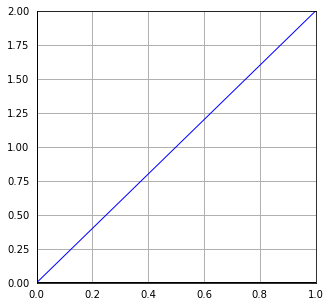

In [6]:
def g(x):
    return(2*x) 

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()


### 1차원 연속형 확률변수의 정의
- 확률변수가 취할 수 있는 값은 구간 [a,b]로 정의되며 확률은 확률밀도함수(PDF) 또는 간단히 밀도함수라고 부르는 f(x)에 의해 정의된다.
- 밀도함수 등으로 둘러싸인 영역의 면적이 확률이 된다는 연속형 확률변수의 개념이 중요하다.


#### 과제 0829_1
p.173 ~ 180 예제 풀어보기

In [9]:
x_range = np.array([0,1])

def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0
    
X = [x_range, f]

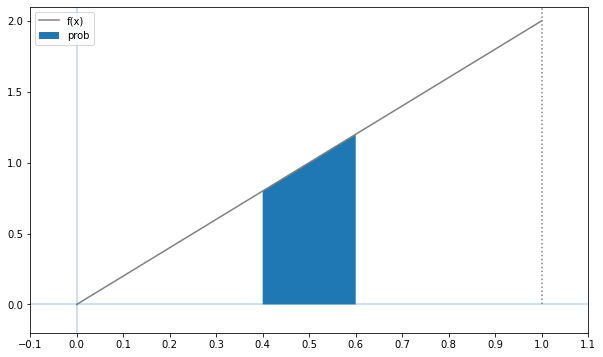

In [12]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs,[f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

xs = np.linspace(0.4, 0.6, 100)
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [14]:
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [16]:
from scipy.optimize import minimize_scalar

res=minimize_scalar(f)

res.fun

0

In [17]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [18]:
def F(x):
    return integrate.quad(f,-np.inf, x)[0]

F(0.6) - F(0.4)

0.200

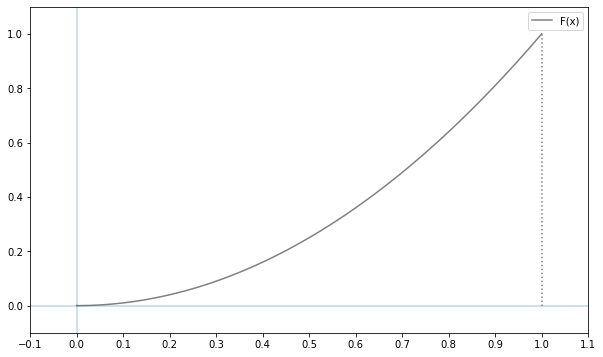

In [19]:
xs = np.linspace(x_range[0],x_range[1],100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs,[F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)
ax.legend()

plt.show()

#### 과제 0829_2
p.181 ~ 187 예제 풀어보기

In [20]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3)/2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

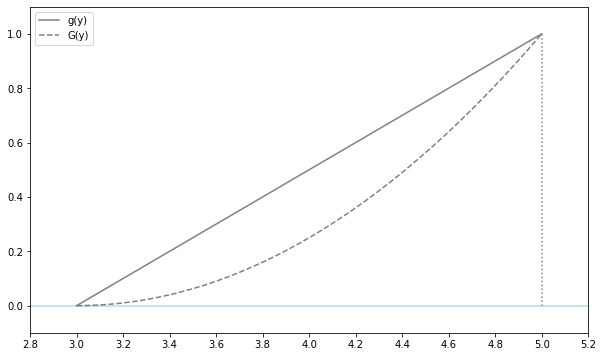

In [21]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys], label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys], label='G(y)', ls='--', color='gray')
ax.hlines(0,2.8,5.2,alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [22]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [23]:
def E(X, g=lambda x: x):
    x_range, f=X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

E(X)

0.667

In [24]:
E(X, g=lambda x: 2*x+3)

4.333

In [25]:
mean = E(X)
def integrand(x):
    return(x - mean) **2 *f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [26]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean) **2 *f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

V(X)

0.056

In [27]:
V(X, lambda x: 2*x+3)

0.222

In [28]:
2**2 * V(X)

0.222

#### 과제 0829_3
p.188 ~ 191 예제 풀어보기

In [25]:
x_range = [0,2]
y_range = [0,1]

def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4  * y * (x-y)
    else:
        return 0

XY = [x_range, y_range, f_xy]

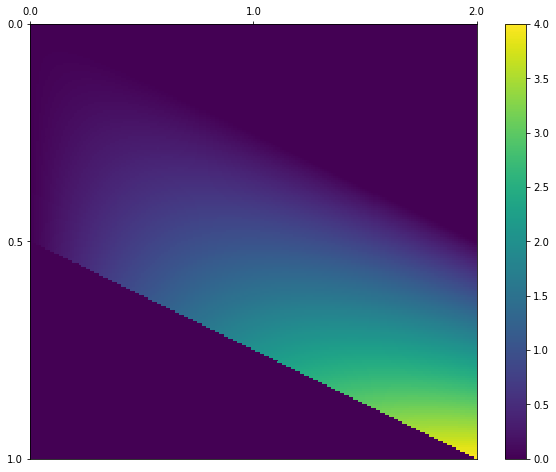

In [26]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x,y) for y in ys] for x in xs])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0,200,3), minor=False)
ax.set_yticks(np.linspace(0,200,3), minor=False)
ax.set_xticklabels(np.linspace(0,2,3))
ax.set_yticklabels(np.linspace(0,1,3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [27]:
integrate.nquad(f_xy, [[-np.inf, np.inf],
                       [-np.inf, np.inf]])[0]

1.326

#### 과제 0829_4
미분, 적분 공부한 후 미적분 관계를 설명해보세요.

```
미분 : 접선의 기울기
적분 : 면적
미분 적분의 관계 : 반대
```

#### 과제 0830_1
p.192 ~ 199 예제 풀어보세요(colab 이용)

https://colab.research.google.com/drive/1xinPjgdNO_r3x0At5sOGtHMW4TTv0x8F?hl=ko#scrollTo=6R6JtBmvfYh1

In [28]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

X=[x_range, f_X]
Y=[y_range, f_Y]

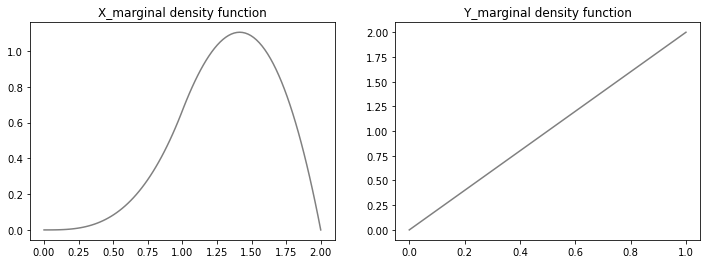

In [29]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

In [30]:
def integrand(x,y):
    return x * f_xy(x,y)

integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

0.863

In [31]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x,y):
        return g(x,y)*f_xy(x,y)
    return integrate.nquad(integrand,[[-np.inf,np.inf],[-np.inf, np.inf]])[0]

In [32]:
mean_X = E(XY, lambda x,y:x)
mean_X

0.863

In [33]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.000

In [34]:
a, b = 2, 3
E(XY, lambda x, y : a*x + b*y)

4.749

In [35]:
a*mean_X + b*mean_Y

1.727

In [36]:
def integrand(x, y):
    return (x-mean_X)**2 * f_xy(x,y)

integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

0.006

In [37]:
def V(XY,g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x,y):
        return (g(x,y) - mean)**2 *f_xy(x,y)
    
    return integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

In [38]:
var_X = V(XY, lambda x, y: x)
var_X

0.006

In [39]:
var_Y = V(XY, lambda x, y:y)
var_Y

1.689

In [40]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x-mean_X)*(y-mean_Y)*f_xy(x,y)
    
    return integrate.nquad(integrand, [[-np.inf, np.inf],[-np.inf, np.inf]])[0]

In [41]:
cov_xy = Cov(XY)
cov_xy

-0.000

In [42]:
V(XY, lambda x, y: a*x + b*y)

0.824

In [43]:
a**2 * var_X + b**2 *var_Y + 2*a*b * cov_xy

15.223

In [44]:
cov_xy / np.sqrt(var_X*var_Y)

-0.001

## 대표적인 연속형 확률 분포

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

In [13]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0] # 적분값과 추정 오차를 반환하는 함수(피적분함수, 적분 범위)

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):  # 확률변수와 구간을 인수로 취하고 그 확률변수의 밀도함수와 분포함수를 그리는 함수
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

### 정규분포

- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현. 가우스 분포라고도 부름.
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 $평균(\mu)과 분산(\sigma^2)$ 두가지이다. $N(\mu,\sigma^2)$으로 표기

- 정규분포의 밀도 함수
<img src = '정규분포.jpg' STYLE='width 200px;'>


- Numpy의 numpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
- 자연상수(natural constant) e는 2.718281828459045… 이란 숫자입니다. 파이(π)처럼 소수점 아래에 끝이 없는 무리수
- 자연 로그(natural logarithm)의 라틴 이름은 logarithm naturali 인데요, 이를 줄여서 ln이라고 합니다. 자연로그는 자연 상수 e를 밑(base)으로 하는 로그(log)입니다.
- 자연 상수 e는 어떤 대상이 얼마 만큼 성장했는지를 알려 주는 수라면, 자연로그는 그 성장을 이루기 위해 얼마의 시간(또는 기간)이 필요한 지를 계산하는 것이라고 볼 수 있습니다.
- 자연 상수 e의 의미와 자연 상수 e와 자연 로그의 관계를 이해하면, 자연 로그 값이 왜 성장을 달성하기 위한 시간(기간)을 알려 주는 지 이유를 알 수 있는데요


In [12]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2 / (2*sigma**2))
    return x_range, f

In [13]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [14]:
check_prob(X)

expected vaue 2.000
variance 0.250


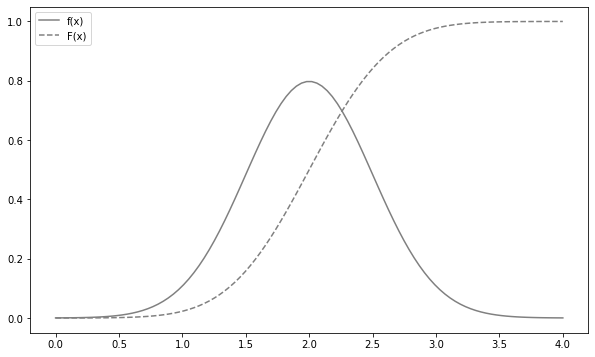

In [15]:
plot_prob(X, 0, 4)

In [17]:
# scipy.stats.norm 은 가우시안 정규분포 객체를 생성하는 메서드
rv = stats.norm(2, 0.5)
rv

In [18]:
rv.mean(), rv.var()

(2.0, 0.25)

In [19]:
rv.pdf(2)

0.7978845608028654

In [26]:
rv.cdf(1.7)

0.27425311775007355

In [27]:
# isf : 생존함수의 역함수(inverse survival function), 상위 30% 점
rv.isf(0.3)

2.2622002563540207

In [28]:
# interval : 확률이 알파가 되는 가운데 부분의 구간을 구할 수 있다. (90% 구간)
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [29]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

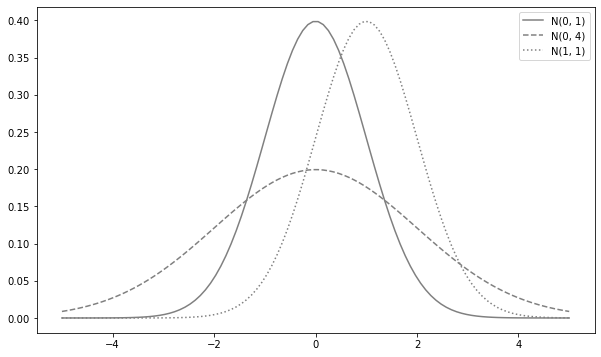

In [37]:
inestyles = ['-','--',':']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100) # -5~5까지 100개
params = [(0, 1), (0, 2), (1, 1)]  # 세가지 파라미터 (평균분산의 집합)
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()


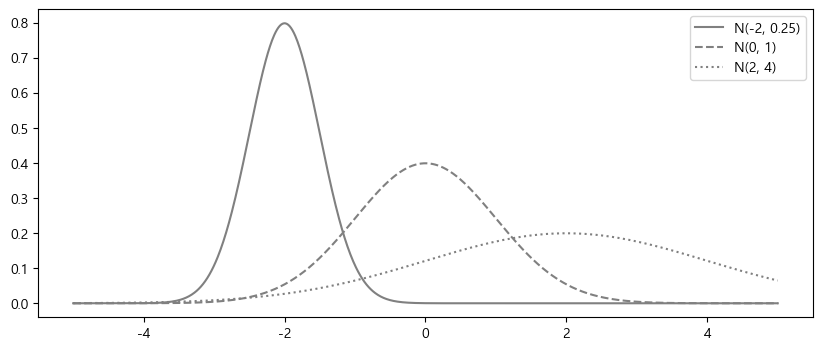

In [73]:
inestyles = ['-','--',':']
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 1000) # -5~5까지 100개
params = [(-2, 0.5), (0, 1), (2, 2)]  # 세가지 파라미터 (평균분산의 집합)
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()


In [43]:
stats.norm.pdf(loc=0, scale=1, x=0)

0.3989422804014327

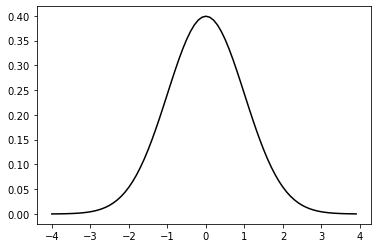

In [46]:
x_plot = np.arange(-4, 4, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=0, scale=1), color='black')

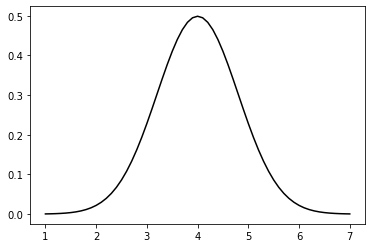

In [48]:
# x : 1 ~ 7.1 , 평균 4, 표준편차 0.8

x_plot = np.arange(1, 7.1, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8), color='black')

In [49]:
# 확률변수가 4일때의 확률밀도
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=4)

0.49867785050179086

In [88]:
# 누적분포함수
rv = stats.norm(loc=4,scale=0.8)
stats.norm.cdf(loc=4, scale=0.8, x=7)

0.9999115827147992

#### 과제 0830_2
- 상기 누적분포함수를 그래프로 출력하세요.
- 확률변수가 4일때 누적분포값(확률)
- 확률이 0.5 일때 확률변수를 구하세요.

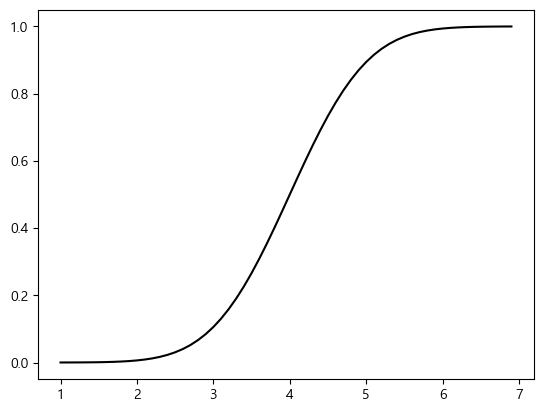

In [89]:
#누적분포함수 그래프
x_plot = np.arange(1, 7, 0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=4, scale=0.8), color='black')

In [90]:
#확률변수가 4일때 누적분포값
rv.cdf(4)

0.5

In [91]:
#확률이 0.5 일때 확률변수
rv.isf(0.5)

4.0

### 확률분포함수

- pmf 확률질량함수(probability mass function)
- pdf 확률밀도함수(probability density function)
- cdf 누적분포함수(cumulative distribution function)
- ppf 누적분포함수의 역함수(inverse cumulative distribution function)
- sf 생존함수(survival function) = 1 - 누적분포함수
- isf 생존함수의 역함수(inverse survival function)
- rvs 랜덤 표본 생성(random variable sampling)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html



Text(0.5, 1.0, '확률밀도함수와 누적분포함수')

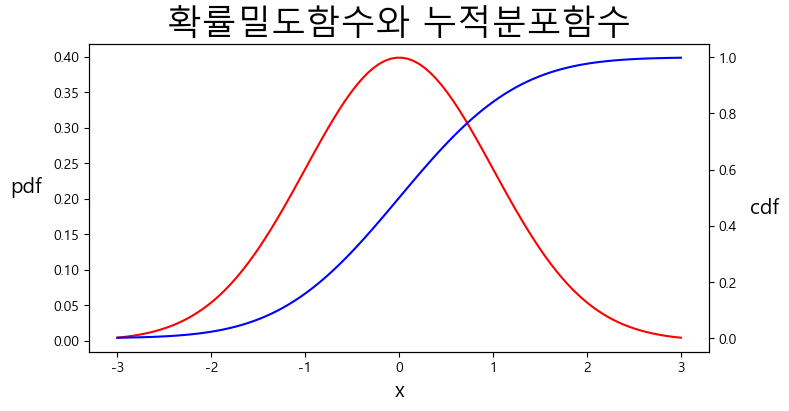

In [92]:
from matplotlib import rc
plt.style.use('default')
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8, 4))  
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
rv = stats.norm(0, 1)
xx = np.linspace(-3,3,100)
y1 =rv.pdf(xx)
y2 =rv.cdf(xx)
        # 플롯 사이즈 지정
ax1.plot(xx, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성  
ax2.plot(xx, y2, color='blue')
ax1.set_xlabel("x",fontsize=15)                      # x축 레이블 지정
ax1.set_ylabel("pdf",rotation=0, fontsize=15,labelpad=20) 
ax2.set_ylabel("cdf",rotation=0, fontsize=15,labelpad=20) # y축 레이블 지정
                         # 플롯에 격자 보이기
# ax1.legend(loc='center left')              # 범례 표시
# ax2.legend(loc='center right') 
plt.title('확률밀도함수와 누적분포함수',fontsize=25)


In [93]:
rv.cdf(0)

0.5

In [96]:
rv.cdf(1)

0.8413447460685429

In [97]:
# ppf : 누적분포함수의 역함수. 누적분포가 0.5인 x값
rv.ppf(0.5)

0.0

In [98]:
rv.ppf(0.95)

1.6448536269514722

In [99]:
# 0 ~ 1 까지 누적확률분포
rv.cdf(1) - rv.cdf(0)

0.3413447460685429

In [100]:
# (-2 < x < 2) 확률을 구하세요.
rv.cdf(2) - rv.cdf(-2)

0.9544997361036416

#### 과제 0830_3
- 상위 5% 확률의 확률변수를 구하세요.
- 하위 5% 확률의 확률변수를 구하세요.

In [101]:
rv.isf(0.05)

1.6448536269514729

In [102]:
rv.isf(0.95)

-1.6448536269514722

#### 과제 0830_4
1. 어느 회사에서 종업원들의 근무기간을 조사하였는데, 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오 

2. 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760일 이하일 확률 구하시오 

3. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가 80점 이상이고 90점 이하일 확률을 구하시오


In [3]:
# 1. 14년 이상 근무한 종업원의 비율
# N(11, 4**2) -> 3년 ~ 19년
rv = stats.norm(11,4)
rv.mean(),rv.var()

(11.0, 16.0)

In [15]:
1 - rv.cdf(14)

0.227

In [7]:
# 2. 전구의 수명이 760 이하일 확률
# N(800, 30**2) ->  740 ~ 860일

rv = stats.norm(800,30)
rv.mean(),rv.var()

(800.0, 900.0)

In [11]:
rv = stats.norm(800,30)
rv.cdf(760)

0.09121121972586788

In [9]:
# 3. 점수가 80점 이상, 90점 이하일 확률
# N(70, 8**2)
rv = stats.norm(70, np.sqrt(64))
rv.cdf(90)-rv.cdf(80)

0.09944010834107919

## 지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0이상의 실수
- 지수분포의 파라미터는 $\lambda$로 양의 실수이며 지수분포를 Ex($\lambda$)로 표기한다.
- Ex($\lambda$)는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격을 따르는 확률분포이다.
- 지수분포의 밀도함수 :

$$f(x) = {\lambda}e^{{-\lambda}x} (x \ge 0)$$

                                                           0        (otherwise)


In [12]:
def Ex(lam):
    x_range = [0,np.inf]
    def f(x):
        if x>= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [18]:
lam = 2
X = Ex(lam)

In [19]:
check_prob(X)

expected vaue 0.500
variance 0.250


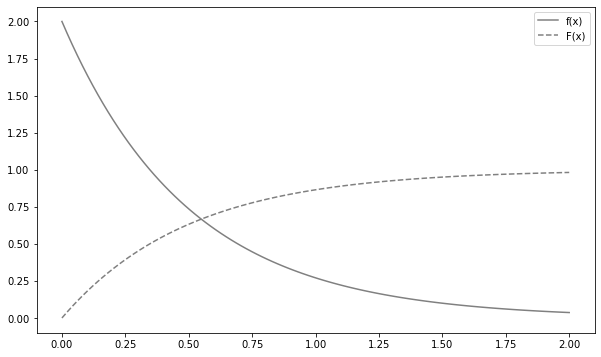

In [20]:
plot_prob(X,0,2)

#### 과제 0831_1
상기 지수분포에서 lambda를 1,2,3으로 변환시켰을 때 그래프의 변화 모습을 출력하고 의미를 설명하세요.

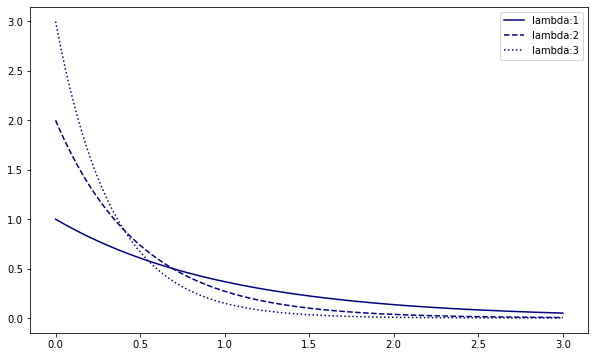

In [40]:
# lambda 1,2,3

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,3,100)
for lam, ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
           label=f'lambda:{lam}',ls=ls, color='navy')
ax.legend()
plt.show()

## 카이제곱분포
- 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어진다.
- 자유도가 커지면 좌우대칭에 가까워진다.
- 자유도의 값 가까이에 분포의 정점이 있다.


#### 과제 0831_2
p.219 ~ 223 예제 코드 작성

In [21]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
Zs_sample = rv.rvs((n, sample_size))
chi2_sample = np.sum(Zs_sample**2, axis=0)

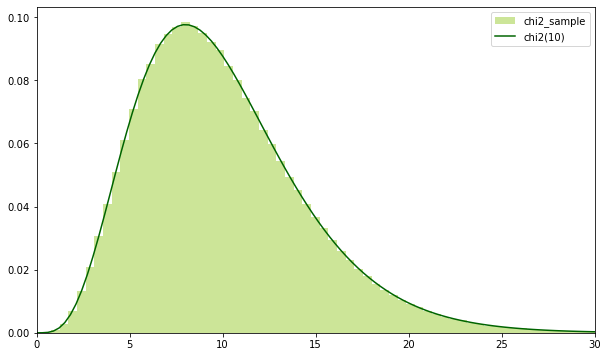

In [30]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True, 
        alpha=0.5, label='chi2_sample', color='yellowgreen')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})',color='darkgreen')

ax.legend()
ax.set_xlim(0,30)
plt.show()

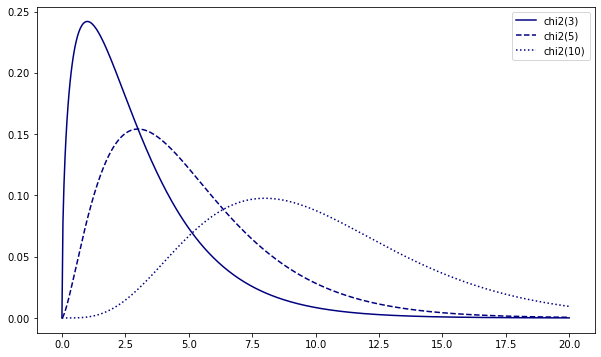

In [23]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,20,500)
for n, ls in zip([3,5,10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs), label=f'chi2({n})', ls=ls, color='navy')
ax.legend()
plt.show()

In [25]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355

## t분포
- 정규분포에서 모평균의 구간추정 등에 사용되는 확률분포
- 확률변수 Z, Y는 서로 독립이고 Z는 표준정규분포 N(0,1)을 Y는 자유도가 n인 카이제곱분포 $\chi^2(n)$을 각각 따를 때 t = ${Z} \over{\sqrt{{Y}\over{n}}}$ 의 확률분포를 자유도가 n인 t분포라고 한다.
- t분포의 의미
  * 모분산을 모르는 상황에서도 표본평균의 분포에 대하여 얘기할 수 있다.
  * t분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화함
  * 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있다.
- t분포의 특성
  * t분포는 모집단이 정규분포이더라도 분산 $\sigma^2$이 알려져 있지 않고 표본의 수가 적은 경우에 평균 $\mu$에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰이는 분포이다.
  * t분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.
  * t분포는 꼬리는 표준정규분포 보다 두껍다(fat tail)
  * t분포는 자유도 n에 따라 모습이 변하는데 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴한다. 통상 모집단의 분산이 알려져 있지 않은 경우, 표분분포를 결정할 때 표본의 크기가 30 이하이면 t분포를, 그 크기가 30 이상이면 표준정규분포를 이용


#### 과제 0831_3
p.224 ~ 228 예제 코드 작성

In [27]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

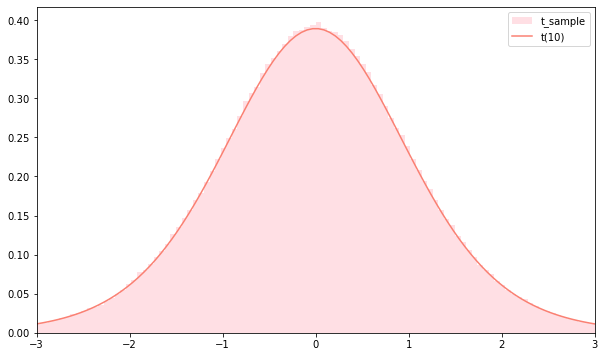

In [29]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3,3),
       density=True, alpha=0.5, label='t_sample', color='pink')
ax.plot(xs,rv.pdf(xs), label=f't({n})', color='salmon')

ax.legend()
ax.set_xlim(-3,3)
plt.show()

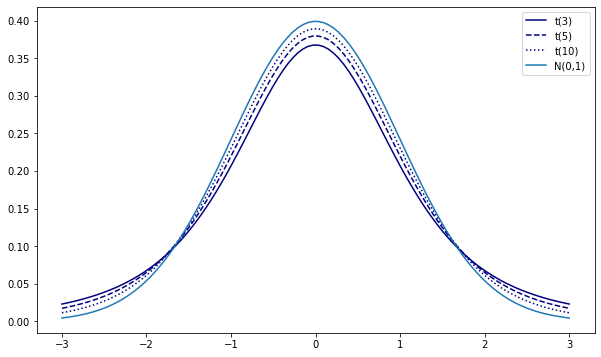

In [31]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3,5,10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs), label=f't({n})',ls=ls, color='navy')
    
rv = stats.norm()
ax.plot(xs,rv.pdf(xs),label='N(0,1)')

ax.legend()
plt.show()

In [32]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

## F분포
- 확률변수 $Y_1, Y_2는 서로 독립이고 각각 Y_1$ ~ ${\chi}^2(n_1), Y_2$ ~ ${{\chi}^2(n_2)}$를 따를 때,
F = ${Y_1/n_1}\over{Y_2/n_2} $의 확률분포를 자유도 $n_1,n_2$인 F분포 F$(n_1,n_2)$라고 한다.
- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
- F분포가 취할 수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.


#### 과제 0831_4
p.229 ~ 232 예제 코드 작성

In [33]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)
sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

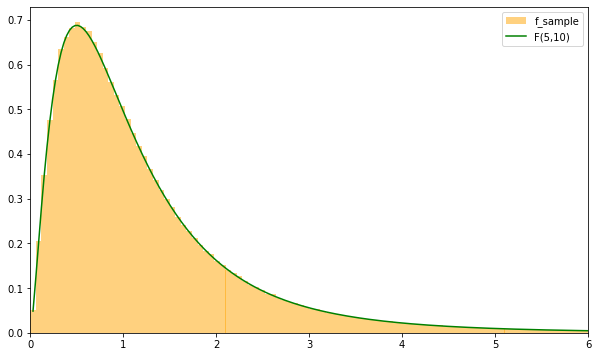

In [38]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0,6,200)[1:]
ax.hist(f_sample, bins=100, range=(0,6),
       density=True, alpha=0.5, label='f_sample',color='orange')
ax.plot(xs, rv.pdf(xs), label=f'F({n1},{n2})',color='green')

ax.legend()
ax.set_xlim(0,6)
plt.show()

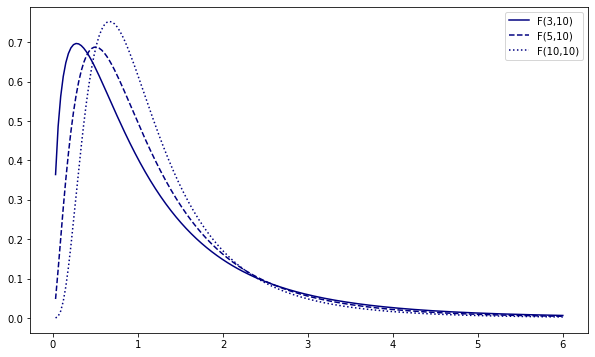

In [39]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,6,200)[1:]
for n1, ls in zip([3,5,10],linestyles):
    rv = stats.f(n1,10)
    ax.plot(xs,rv.pdf(xs), label=f'F({n1},10)',ls=ls,color='navy')
ax.legend()
plt.show()

## 독립동일분포
- 확률변수가 서로 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않는다는 의미이다.
- 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있다.
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(0)
%precision 3

'%.3f'

In [2]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])


### 독립성의 정의
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
- 2차원 확률변수 (X,Y)의 경우 다음과 같은 관계가 성립할 때 X,Y는 독립이라고 함.  
$f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다.
- 일반화 : $f_{X_1,X_2,...,X_n}(x_1,x_2,..x_n) = f_{X_1}(x_1)f_{X_2}(x_2)···f_{X_n}(x_n)$  
※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄


### 독립성과 무상관성
- 공분산이나 상관계수가 0일 때 무상관이라 하고 두 확률변수 사이에는 상관성, 즉 선형 관계가 없음을 나타냄
- 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
 * 무상관성보다 독립성이 더 강한 개념
 * 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만 X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아님


In [3]:
# 불공정한 주사위의 예
x_set = np.array([1,2,3,4,5,6])
y_set = np.array([1,2,3,4,5,6])

def f_XY(x,y):
    if x in x_set and y in y_set:
        return x*y / 441
    else:
        return 0

XY = [x_set,y_set,f_XY]

In [4]:
# 2차원 확률변수 X와 Y는 독립
# 공분산이 0이므로 무상관
Cov(XY)

-0.000

In [5]:
# 무상관인 2개의 확률변수 고려
x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x,y):
    if (x,y) in [(0,0),(1,1),(1,-1)]:
        return 1/3
    else:
        return 0
    
XY = [x_set,y_set,f_XY]

In [6]:
Cov(XY)

0.000

In [7]:
f_X(0)*f_Y(0),f_XY(0,0)

(0.111, 0.333)

In [8]:
f_X(1)*f_Y(-1),f_XY(1,-1)

(0.222, 0.333)

## 합의 분포
- 서로 독립이고 동일한 확률분포을 따르는 확률변수 $X_1,X_2,···,X_n의 합 \sum_{i=1}^n X_i = X_1 + X_2 + ···+ X_n$이 따르는 확률분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 n으로 나눈 표본평균의 분포도 쉽게 이해할 수 있음
- 확률변수 합의 기댓값 : $E(X_1 + X_2 + ··· + X_n) = E(X_1) + E(X_2) + ··· E(X_n)$ 이 성립
- 확률변수 합의 공식 : $X_1, X_2, ··· ,X_n이 서로 독립이면  V(X_1 + X_2 + ··· + X_n) = V(X_1) + V(X_2) + ··· V(X_n)$이 성립  
결국 합의 분포 분산도 각 확률변수에 대한 분산의 합으로 계산할 수 있다.


#### 정규분포 - 합의 분포

In [10]:
# 정규분포 합의 분포
# 서로 독립인 X~N(1,2), Y~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따름

rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
print(X_sample)
print(Y_sample)
sum_sample = X_sample + Y_sample

print('평균 : ',np.mean(X_sample),'분산 : ',np.mean(Y_sample))
print('분산 : ',np.var(X_sample), np.var(Y_sample))
print('합의 평균, 분산 : ', np.mean(sum_sample), np.var(sum_sample))

[ 0.67   2.366  1.628 ...  0.688 -0.51   1.459]
[-2.63   2.433 -0.893 ...  0.051  3.648  0.004]
평균 :  0.9986617043495317 분산 :  2.0018287793565332
분산 :  2.0004790222691637 2.9931731057340802
합의 평균, 분산 :  3.0004904837060664 4.989750326542952


#### 과제 0901_1
p.243 ~ 250 예제 풀기

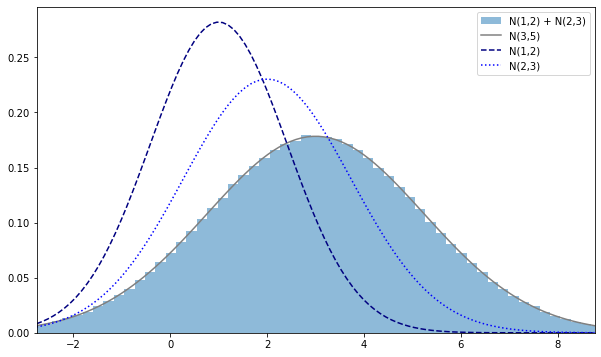

In [12]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005),100)

ax.hist(sum_sample, bins=100, density=True,
       alpha=0.5, label='N(1,2) + N(2,3)')
ax.plot(xs, rv.pdf(xs), label='N(3,5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1,2)', ls='--', color='navy')
ax.plot(xs, rv2.pdf(xs), label='N(2,3)', ls=':', color='blue')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

#### 포아송 분포 - 합의 분포

In [13]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.999, 7.001)

C:\Users\admin\AppData\Local\Temp\ipykernel_1844\1669953384.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)


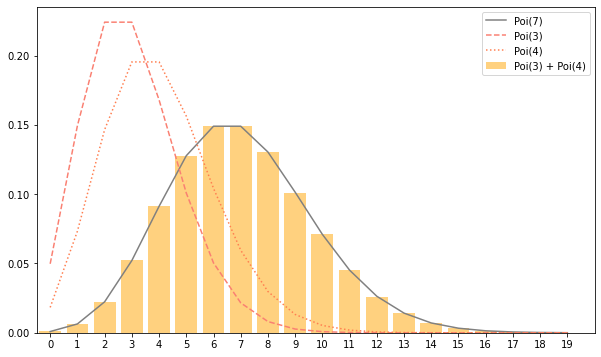

In [19]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist,_ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)
ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)', color='orange')
ax.plot(xs, rv.pmf(xs),label='Poi(7)', color='gray')
ax.plot(xs, rv1.pmf(xs),label='Poi(3)',ls='--', color='salmon')
ax.plot(xs, rv2.pmf(xs),label='Poi(4)', ls=':', color='coral')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))

plt.show()

#### 베르누이 분포 - 합의 분포

In [20]:
p=0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.997, 2.096)

C:\Users\admin\AppData\Local\Temp\ipykernel_1844\3000258197.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)


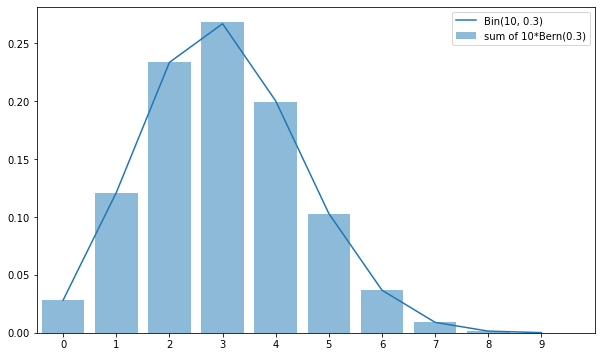

In [21]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10,p)
xs = np.arange(10)
hist,_ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

## 표본평균의 분포
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1, X_2, ...,X_n$의 표본평균이 따르는 분포
- 이 분포는 중심극한정리나 대수의 법칙 등 추측통계에서 중요한 성질을 담고 있기 때문에 유의해야 함
- 표본평균의 기댓값과 분산  
$E(\bar{X}) = \mu$  
$V(\bar{X}) = {\sigma}^2 / n$

### 중심극한정리
- 확률변수 $X_1,X_2,...Xn$이 서로 독립이고 기댓값이 $\mu, 분산이 {\sigma}^2$인 확률분포 F를 따를 때 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N(\mu,{\sigma}^2/n)$에 가까워진다.

### 대수의 법칙
확률변수 $X_1,X_2,...,X_n$이 서로 독립이고 평균이 $\mu, 분산이 \sigma^2$일 것 같은 확률분포를 따를 때 n이 커짐에 따라 표본평균은 $\mu$에 수렴한다.


#### 과제 0901_2

p.251 ~ 260 예제 풀기

#### 정규분포 - 표본평균 분포

In [22]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n=10
sample_size = int(1e6)
Xs_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(1.000, 0.200)

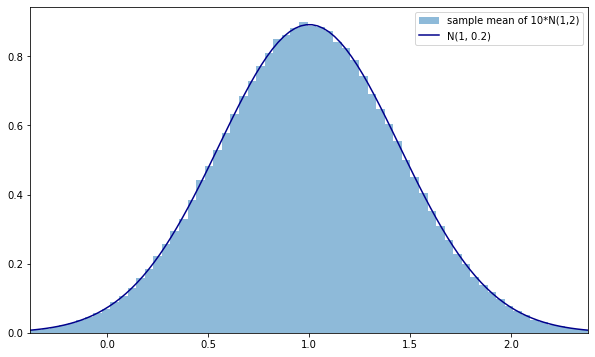

In [25]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999),rv_true.isf(0.001),100)
ax.hist(sample_mean, bins=100, density=True,
       alpha=0.5, label='sample mean of 10*N(1,2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='darkblue')

ax.legend()
ax.set_xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()

#### 포아송분포 - 표본평균 분포

In [26]:
l=3
rv = stats.poisson(l)

n=10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.999, 0.300)

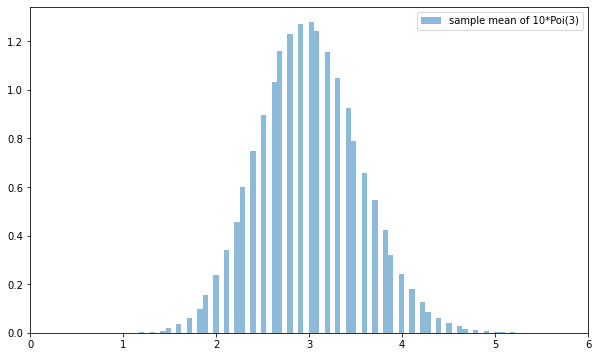

In [27]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
       alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0,6)
plt.show()

#### 중심극한정리

In [30]:
l = 3
rv = stats.poisson(l)

n=10000
sample_size=10000
Xs_sample=rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999),rv_true.isf(0.001),100)

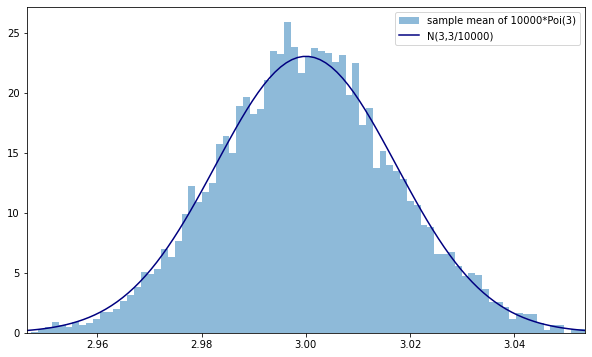

In [31]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean,bins=100,density=True,
       alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs),label='N(3,3/10000)',color='navy')

ax.legend()
ax.set_xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()

#### 대수의 법칙

In [41]:
p=1/6
rv=stats.bernoulli(p)

n=int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100,n,50).astype(int)
plot_list = np.array([np.mean(sample[:sp],axis=0) for sp in space]).T

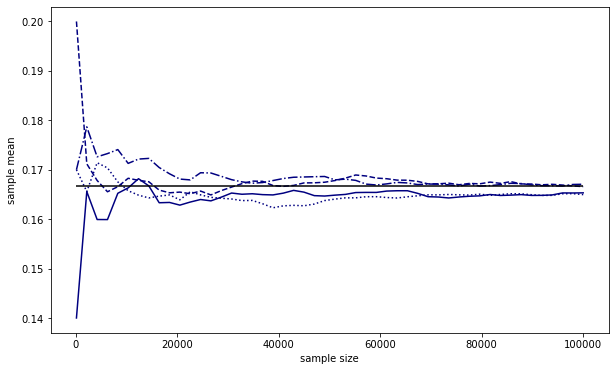

In [42]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='navy')
ax.hlines(p,-1,n,'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()

#### 과제 0901_3
중심극한정리와 대수의 법칙을 사례를 들어 설명하세요.